# Experiment 5: Part 1: A* Algorithm
- Name: **Anas Muhammmed Sahil**
- Date: 07-02-2025
- Roll Number: 20242AIE0010

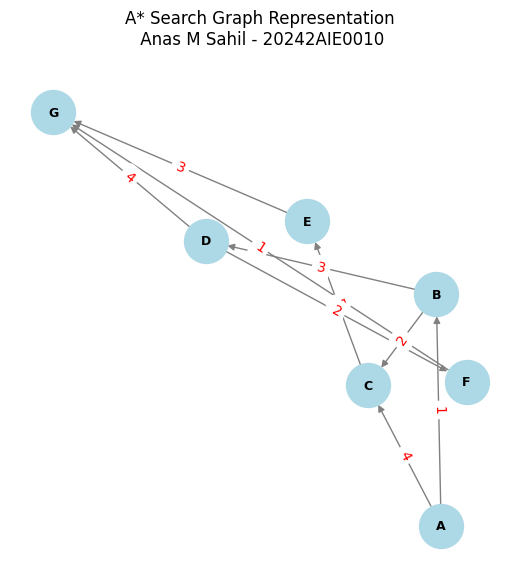

B C D C E G F G 
Path found: ['A', 'B', 'D', 'F', 'G']
Cost: 7


['A', 'B', 'D', 'F', 'G']

In [5]:
from typing import List
import networkx as nx
import matplotlib.pyplot as plt

def a_star(start, stop):

    open_set, closed_set = {start}, set()
    g, parents = {start: 0}, {start: start}
    cost = 0
    while open_set:
        current = min(open_set, key=lambda node: g[node]
                      + H_dist.get(node, None))
        if current == stop or current not in graph_nodes:
            pass
        else:
            for neighbor, weight in graph_nodes.get(current, None):
                print(neighbor, end=' ')
                if neighbor not in open_set and neighbor not in closed_set:
                    open_set.add(neighbor)
                    parents[neighbor] = current
                    g[neighbor] = g[current] + weight
                    cost = g[neighbor] + H_dist.get(neighbor, None)
                elif g[neighbor] > g[current] + weight:
                    open_set.add(neighbor)
                    parents[neighbor] = current
                    g[neighbor] = g[current] + weight
                    closed_set.discard(neighbor)
                    cost = g[neighbor] + H_dist.get(neighbor, None)
        if not current:
            print('\nPath does not exist!')
            return
        if current == stop:
            path: List = []
            while parents[current] != current:
                path.append(current)
                current = parents[current]
            path.append(start)
            path.reverse()
            print('\nPath found:', path)
            print('Cost:', cost)
            return path
        open_set.remove(current)
        closed_set.add(current)
    print('\nPath does not exist!')
    return None


H_dist = {
    'A': 5,
    'B': 6,
    'C': 4,
    'D': 3,
    'E': 3,
    'F': 1,
    'G': 0,
}

graph_nodes = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 3), ('C', 2)],
    'C': [('E', 5)],
    'D': [('G', 4), ('F', 2)],
    'E': [('G', 3)],
    'F': [('G', 1)],
}

G = nx.DiGraph()

for node, edges in graph_nodes.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=9, font_weight='bold', arrows=True)
edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("A* Search Graph Representation\n Anas M Sahil - 20242AIE0010", pad=18.0)
plt.show()

# f(n) = g(n) + h(n)
a_star('A', 'G')

## IMP_2

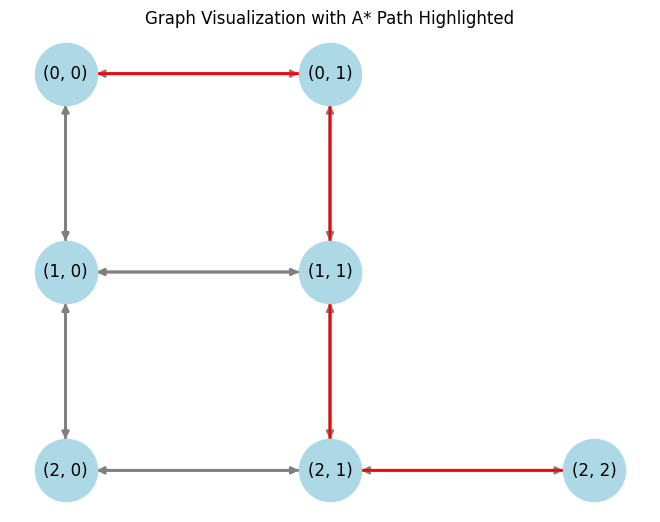

In [6]:
## Iteration 2

import heapq
import networkx as nx
import matplotlib.pyplot as plt

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(graph, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph}
    f_score[start] = heuristic(start, goal)

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor, cost in graph[current].items():
            tentative_g_score = g_score[current] + cost
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    total_path.reverse()
    return total_path

def path_to_edges(path):
    return [(path[i], path[i + 1]) for i in range(len(path) - 1)]

# Define the graph
graph = {
    (0, 0): {(1, 0): 1, (0, 1): 1},
    (1, 0): {(0, 0): 1, (1, 1): 1, (2, 0): 1},
    (0, 1): {(0, 0): 1, (1, 1): 1},
    (1, 1): {(1, 0): 1, (0, 1): 1, (2, 1): 1},
    (2, 0): {(1, 0): 1, (2, 1): 1},
    (2, 1): {(2, 0): 1, (1, 1): 1, (2, 2): 1},
    (2, 2): {(2, 1): 1}
}

start = (0, 0)
goal = (2, 2)

# Use NetworkX to create the graph
G = nx.DiGraph()
for node, edges in graph.items():
    for dest, weight in edges.items():
        G.add_edge(node, dest, weight=weight)

# Get the path from A* algorithm
path = a_star(graph, start, goal)

# Plotting
pos = {node: (node[1], -node[0]) for node in graph}
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray', width=2)
nx.draw_networkx_edges(G, pos, edgelist=path_to_edges(path), edge_color='red', width=2)
plt.title('Graph Visualization with A* Path Highlighted')
plt.show()
